In [1]:
!pip install astsadata statsmodels --upgrade

     |████████████████████████████████| 481kB 4.0MB/s 
     |████████████████████████████████| 9.5MB 22.2MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa as tsm
from matplotlib.gridspec import GridSpec
from astsadata import *

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


# Section 3.9 Multiplicative Seasonal ARIMA Models

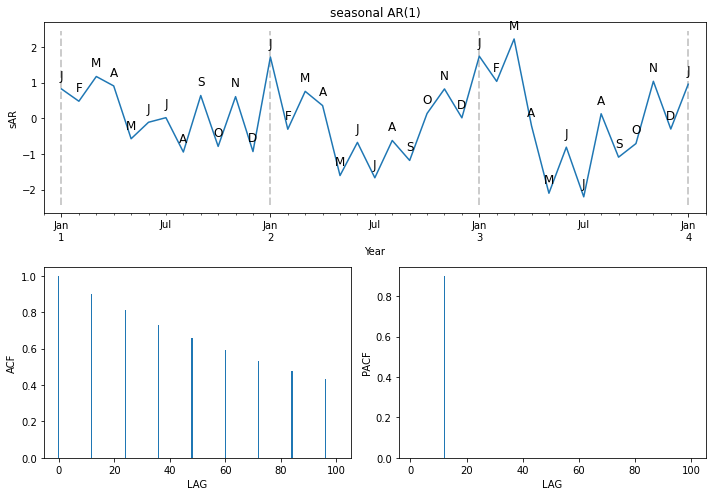

In [3]:
# Example 3.46
np.random.seed(666)
phi = np.array([*np.repeat(0, 11), -.9])
sAR = tsm.arima_process.arma_generate_sample(ar=[1, *phi], ma=[1, 0], nsample=37)
sAR = pd.Series(sAR, index=pd.period_range("0001", periods=len(sAR), freq="M"))

arma_process = tsm.arima_process.ArmaProcess(ar=[1, *phi], ma=[1, 0])
acf = arma_process.acf(lags=101)
pacf = arma_process.pacf(lags=101)
lags = np.arange(0, 101)

fig = plt.figure(figsize=(10, 7))
gs = GridSpec(nrows=2, ncols=2)

ax0 = fig.add_subplot(gs[0, :])
sAR.plot(axes=ax0)
ax0.set_xlim(ax0.get_xlim()[0] - 1, ax0.get_xlim()[1] + 1)
ax0.vlines(["0001-01", "0002-01", "0003-01", "0004-01"], ymin=ax0.get_ylim()[0],
           ymax=ax0.get_ylim()[1], linewidth=2, color="0.8", linestyle="--")
ax0.set_title("seasonal AR(1)")
ax0.set_xlabel("Year")
ax0.set_ylabel("sAR")

for x, y, label in zip(sAR.index, sAR, np.resize(["J","F","M","A","M","J","J","A","S","O","N","D"], 37)):
    ax0.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center', size="large")

ax1 = fig.add_subplot(gs[1, 0])
ax1.bar(lags, acf, width=.4)
ax1.set_xlabel("LAG")
ax1.set_ylabel("ACF")

ax2 = fig.add_subplot(gs[1, 1])
ax2.bar(lags[1:], pacf[1:], width=.4)
ax2.set_xlabel("LAG")
ax2.set_ylabel("PACF")

fig.tight_layout()
plt.show()

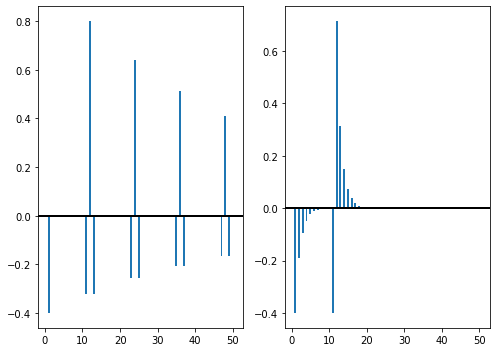

In [4]:
# Example 3.47
phi = np.array([*np.repeat(0, 11), -.8])
arma_process = tsm.arima_process.ArmaProcess(ar=[1, *phi], ma=[1, -.5])
acf = arma_process.acf(lags=51)[1:]
pacf = arma_process.pacf(lags=51)[1:]
lags = np.arange(1, 51)

fig, axes = plt.subplots(ncols=2, figsize=(7, 5))
axes[0].bar(lags, acf, width=.5)
axes[0].axhline(0, color="black", linewidth=2)

axes[1].bar(lags, pacf, width=.5)
axes[1].axhline(0, color="black", linewidth=2)

fig.tight_layout()
plt.show()

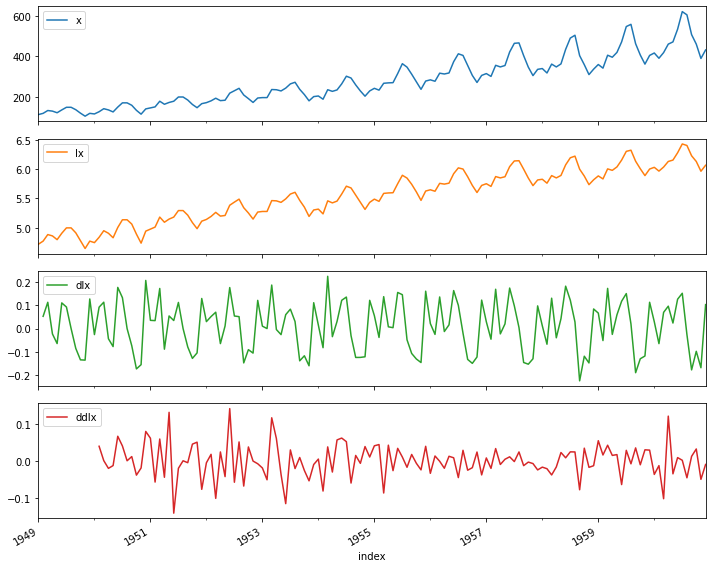

In [5]:
# Example 3.49
x = pd.read_csv("AirPassengers.csv", index_col=0, parse_dates=True)
x.index = x.index.to_period("M")
lx = x.apply(np.log)
dlx = lx.diff().dropna()
ddlx = dlx.diff(12).dropna()

df = pd.concat([x, lx, dlx, ddlx], axis=1)
df.columns = ["x", "lx", "dlx", "ddlx"]

df.plot(subplots=True, figsize=(10, 8))
plt.tight_layout()
plt.show()

In [6]:
model_1 = sm.tsa.SARIMAX(lx, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12), trend="c").fit()
print(model_1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 244.968
Date:                            Fri, 14 May 2021   AIC                           -479.936
Time:                                    06:28:31   BIC                           -465.560
Sample:                                01-31-1949   HQIC                          -474.094
                                     - 12-31-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0001      0.001     -0.197      0.843      -0.002       0.001
ar.L1          0.2013      0.197   

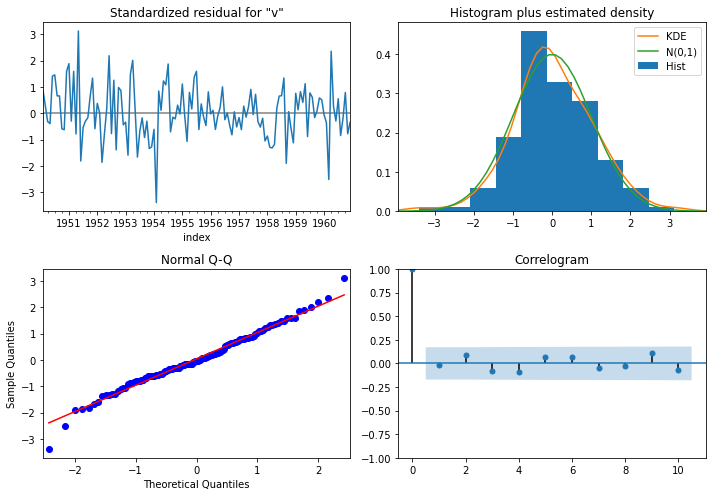

In [7]:
model_1.plot_diagnostics(figsize=(10, 7))
plt.tight_layout()
plt.show()

In [8]:
model_2 = sm.tsa.SARIMAX(lx, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12), trend="c").fit()
print(model_2.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 244.710
Date:                            Fri, 14 May 2021   AIC                           -481.421
Time:                                    06:28:34   BIC                           -469.920
Sample:                                01-31-1949   HQIC                          -476.747
                                     - 12-31-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0002      0.001     -0.161      0.872      -0.002       0.002
ma.L1         -0.4020      0.073   

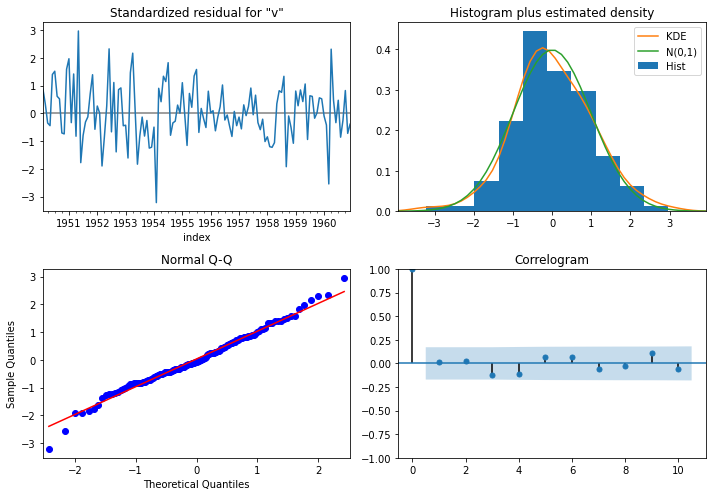

In [9]:
model_2.plot_diagnostics(figsize=(10, 7))
plt.tight_layout()
plt.show()

In [10]:
model_3 = sm.tsa.SARIMAX(lx, order=(1, 1, 0), seasonal_order=(0, 1, 1, 12), trend="c").fit()
print(model_3.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                value   No. Observations:                  144
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                 243.752
Date:                              Fri, 14 May 2021   AIC                           -479.505
Time:                                      06:28:35   BIC                           -468.004
Sample:                                  01-31-1949   HQIC                          -474.831
                                       - 12-31-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0002      0.002     -0.139      0.889      -0.004       0.003
ar.L1         -0.33

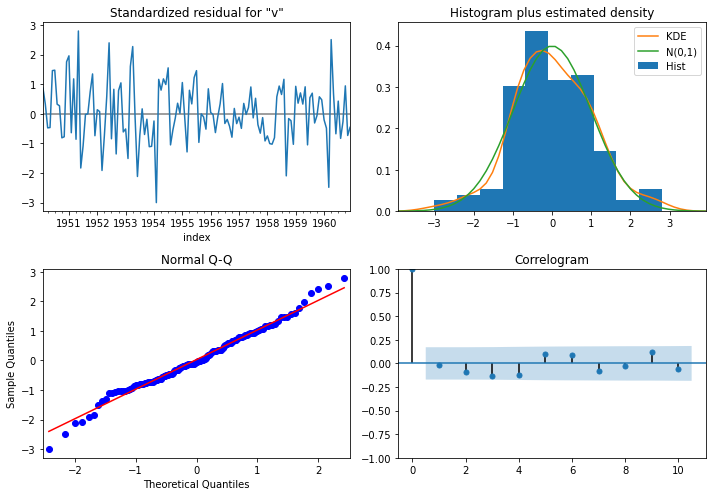

In [11]:
model_3.plot_diagnostics(figsize=(10, 7))
plt.tight_layout()
plt.show()

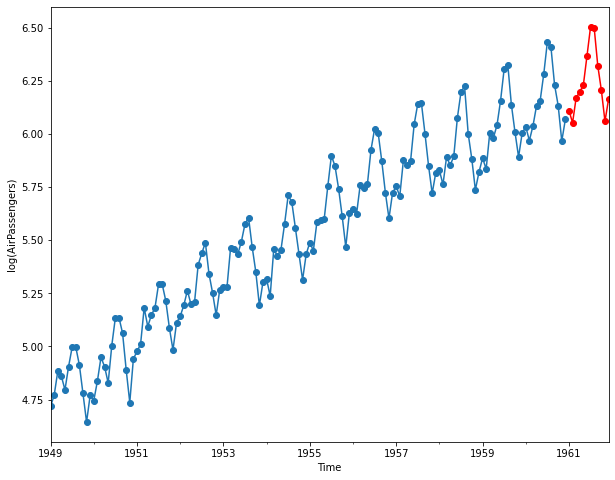

In [12]:
pred = model_2.predict(start=len(lx), end=len(lx) + 11)

lx.plot(xlabel="Time", ylabel="log(AirPassengers)", marker="o", figsize=(10, 8), legend=False)
pred.plot(marker="o", color="red")
plt.show()